# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

#### Below Code represent there are total 42 Marketing campaigns.

In [15]:
import pandas as pd
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')
df.head()
num_campaigns = df['campaign'].nunique()
print(f"The data represents {num_campaigns} marketing campaigns.")

The data represents 42 marketing campaigns.


### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [16]:
import pandas as pd

In [17]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [18]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



### To check dataset, used following Panda functions

For checking missing values: df.isnull().sum()
For data type checking: df.dtypes

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

###  4 ) Understanding the Task

The business objective of this project is to leverage historical marketing campaign data to develop a predictive model that can assist the marketing department of the bank in maximizing the success of their future marketing campaigns. The goal is to identify the most promising target audience and optimize campaign strategies to increase the conversion rate of clients subscribing to term deposits, ultimately improving the bank's revenue and efficiency of marketing efforts.

Key components of this business objective include:
=========================================

Predictive Model: Build a machine learning model that can predict the likelihood of a client subscribing to a term deposit based on various client attributes and campaign details.

Marketing Campaign Optimization: Use the insights from the predictive model to target the right audience segments with tailored marketing strategies. This may involve optimizing the timing, communication channels, and content of marketing campaigns.

Revenue Increase: The primary objective is to increase the bank's revenue by boosting the subscription rate for term deposits, leading to more successful marketing campaigns.

Efficiency Improvement: Ensure that marketing efforts are optimized to use resources effectively and reduce marketing costs.


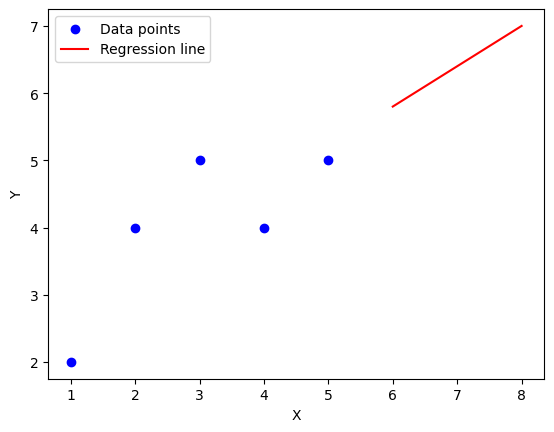

Slope (Coefficient): 0.6
Intercept: 2.2


In [14]:
# Import necessary libraries
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Sample data (x, y)
x = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)  # Input features (reshaped for single feature)
y = np.array([2, 4, 5, 4, 5])  # Target variable

# Create a linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(x, y)

# Make predictions
x_test = np.array([6, 7, 8]).reshape(-1, 1)  # New data points for prediction
y_pred = model.predict(x_test)

# Plot the data and regression line
plt.scatter(x, y, color='b', label='Data points')
plt.plot(x_test, y_pred, color='r', label='Regression line')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

# Print the coefficients (slope and intercept)
print(f"Slope (Coefficient): {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")


### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features (columns 1 - 7), prepare the features and target column for modeling with appropriate encoding and transformations.

###  5) Need to handle both numerical and categorical data appropriately. 

Encoding Categorical Features: 
Columns 1 to 7 include some categorical features (e.g., job, marital, education, default, housing, loan, and contact). Used one-hot encoding to convert these categorical variables into a format that the machine learning model can use.

Selecting the Target Column: 
The target variable is typically a binary outcome, which is mentioned to be column 20, 'y' (has the client subscribed a term deposit?). So selected this column as target variable.

In [21]:
import pandas as pd

# Read the dataset
df = pd.read_csv('data/bank-additional-full.csv', sep=';')

# Select features and target
features = df[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact']]
target = df['y']  # Target variable

# Perform one-hot encoding for categorical features
features_encoded = pd.get_dummies(features, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact'])

# Now, features_encoded contains the encoded features, and target contains the target variable.
# Use these in your machine learning model.


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

### 6) Train/Test Split
To split data into a training set and a test set for machine learning,use the train_test_split function from the scikit-learn library. This function will randomly divide dataset into two subsets: one for training the model and the other for evaluating its performance.

In [22]:
from sklearn.model_selection import train_test_split

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(features_encoded, target, test_size=0.2, random_state=42)

# X_train: Features for training
# X_test: Features for testing
# y_train: Target variable for training
# y_test: Target variable for testing

# The 'test_size' parameter specifies the proportion of data to allocate to the test set (in this case, 20%).

# 'random_state' is set to ensure reproducibility. 


### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

### 7) A Baseline Model

The baseline typically serves as a reference point for evaluating the performance of more complex models. For classification tasks, a common baseline is to use a simple rule, such as predicting the most frequent class in the training data.

In the context of your classification task (predicting whether a client subscribes to a term deposit), the baseline can be defined as follows:

Baseline Performance: The baseline performance for the classifier should be the accuracy achieved by a simple rule, where all predictions are made by selecting the majority class in the training data.

To implement this baseline performance measurement, follow these steps:

Calculate the distribution of the target variable in the training data to determine the majority class.
Predict the majority class for all instances in the test data.
Calculate the accuracy of these predictions.


In [23]:
from sklearn.metrics import accuracy_score

# Calculate the majority class in the training data
majority_class = y_train.value_counts().idxmax()

# Create an array of predictions where all instances are the majority class
baseline_predictions = [majority_class] * len(y_test)

# Calculate the baseline accuracy
baseline_accuracy = accuracy_score(y_test, baseline_predictions)

print(f"Baseline Accuracy: {baseline_accuracy:.2f}")


Baseline Accuracy: 0.89


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

### A Simple Model

Logistic Regression is a suitable choice for building a basic classification model for data. Here's how you can build a simple Logistic Regression model using scikit-learn:

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Create a Logistic Regression model
#model = LogisticRegression()
#model = LogisticRegression(solver='saga')  # Try using a different solver
model = LogisticRegression(max_iter=1000)  # Increase the number of iterations


# Fit the model on the training data
#model.fit(X_train, y_train)

# Make predictions on the test data
#y_pred = model.predict(X_test)



scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Then train the model with the scaled data
model.fit(X_train_scaled, y_train)




LogisticRegression(max_iter=1000)

### Problem 9: Score the Model

What is the accuracy of your model?

### 9) Score the Model

To calculate the accuracy of your Logistic Regression model, you can use the scikit-learn accuracy_score function, which compares the model's predictions to the true labels. Here's how to compute the accuracy:

In [28]:
from sklearn.metrics import accuracy_score

# Calculate the accuracy of the model's predictions on the test data
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy of the Logistic Regression model: {accuracy:.2f}")


Accuracy of the Logistic Regression model: 0.89


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

### 10)  Model Comparisons

To compare the performance of multiple machine learning models, including Logistic Regression, K-Nearest Neighbors (KNN), Decision Tree, and Support Vector Machine (SVM), used the scikit-learn library and create a table to present  findings. Here's a step-by-step approach on how to do this:

1. Import the necessary libraries and models.
2. Train each model on the training data and evaluate their accuracy on both the training and test data.
3. Measure and compare the training time for each model.
4. Create a table to present the findings.

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import time
import pandas as pd

# Define the models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),  # Increase max_iter if needed
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC(),
}

# Initialize lists to store results
model_names = []
train_times = []
train_accuracies = []
test_accuracies = []

# Train and evaluate each model
for model_name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time
    
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))
    
    # Append results to the lists
    model_names.append(model_name)
    train_times.append(train_time)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Create a DataFrame to present the findings
results = pd.DataFrame({
    'Model': model_names,
    'Train Time': train_times,
    'Train Accuracy': train_accuracies,
    'Test Accuracy': test_accuracies
})

# Print the results
print(results)


                 Model  Train Time  Train Accuracy  Test Accuracy
0  Logistic Regression    0.553314        0.887557       0.886502
1                  KNN    0.033193        0.894082       0.873392
2        Decision Tree    0.126845        0.924219       0.854819
3                  SVM   16.886789        0.887557       0.886502


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

### 11) Improving the Model
Improving machine learning models is an essential part of the process. Here are some strategies:

### Feature engineering and exploration :

Feature Selection: Evaluate the importance of features and consider removing or adding relevant features. You can use techniques like feature importance scores from tree-based models or correlation analysis to identify important features.

Categorical Variables: For categorical features, consider one-hot encoding or using techniques like target encoding.

Handling Missing Values: Deal with missing values in a meaningful way, which may involve imputation or feature engineering to capture the missingness.
Feature Scaling: Standardize or normalize numerical features, as some algorithms are sensitive to feature scales.


### Hyperparameter tuning

Use techniques like grid search or random search to find the optimal hyperparameters for your models.

For K-Nearest Neighbors (KNN), explore different values of K, distance metrics, and weighting schemes.

For Decision Trees, adjust hyperparameters like maximum depth, minimum samples per leaf, and criterion (e.g., Gini or entropy).

For Support Vector Machines (SVM), experiment with different kernels (e.g., linear, polynomial, or radial basis function) and the regularization parameter (C).

### Model Selection

Consider trying more advanced models, such as Random Forest, Gradient Boosting, or Neural Networks, to see if they offer improved performance.

Ensemble methods like Random Forest or Gradient Boosting can often provide better accuracy by combining multiple weak learners.

### Performance Metrics

Depending on the business objective, consider using different performance metrics. For instance, if class imbalance is an issue, focus on metrics like precision, recall, F1-score, or area under the ROC curve (AUC) rather than just accuracy.

Remember that model improvement is an iterative process. You should experiment with different approaches and evaluate their impact on model performance. Keep track of the changes you make and document the results to guide your decisions.

##### Questions